In [2]:
import os
import sys

notebook_path = os.path.abspath("__file__")
notebook_directory = os.path.dirname(notebook_path)
parent_directory = os.path.dirname(notebook_directory)
parent_parent_directory = os.path.dirname(parent_directory)

sys.path.append(parent_parent_directory)

In [3]:
import pandas as pd

data = pd.read_csv('../../data//vox1_vox1_meta.csv', sep='\t')

data_dev = data[data['set'] == 'dev']
data_test = data[data['set'] == 'test'] 

In [4]:
def count_users_and_nationalitis(df):
    df_dict = {}
    df_dict['count users'] = len(df)
    df_dict['count f'] = len(df[df['gender']=='f'])
    df_dict['count m'] = len(df[df['gender']=='m'])
    df_dict['number of nationalits'] = df['nationality'].nunique()
    return df_dict


dev_dict = count_users_and_nationalitis(data_dev)
test_dict = count_users_and_nationalitis(data_test)
data_dict = count_users_and_nationalitis(data)

df = pd.DataFrame([dev_dict, test_dict, data_dict], index=['dev', 'test', 'dev_test'])
df

,count users,count f,count m,number of nationalits
dev,1211,546,665,35
test,40,15,25,9
dev_test,1251,561,690,36


In [5]:
pivot_table = pd.pivot_table(data, index='gender', columns='nationality', aggfunc='size', fill_value=0)

pivot_table

nationality,Australia,Austria,Brazil,Canada,Chile,China,Croatia,Denmark,France,Germany,...,South Africa,South Korea,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Trinidad and Tobago,UK,USA
gender,,,,,,,,,,,,,,,,,,,,,
f,12,1,1,25,1,1,1,2,1,5,...,0,1,2,1,0,4,0,1,88,368
m,25,0,0,29,2,1,2,1,0,4,...,1,0,2,0,1,1,3,0,127,431


In [6]:
# Tworzenie tabeli przestawnej (pivot table) zliczającą liczbę mężczyzn i kobiet według narodowości
pivot_table = pd.pivot_table(data, index='nationality', columns='gender', aggfunc='size', fill_value=0)

pivot_table

gender,f,m
nationality,,
Australia,12,25
Austria,1,0
Brazil,1,0
Canada,25,29
Chile,1,2
China,1,1
Croatia,1,2
Denmark,2,1
France,1,0


___


In [41]:
from pathlib import Path
import pandas as pd
from src.config.project_paths import get_data_file_path
import matplotlib.pyplot as plt

ANNOTATION_PATH: Path = get_data_file_path("annotations_with_metadata.json")

annotation_df = pd.read_json(ANNOTATION_PATH, orient="records")

In [56]:
def show_hist_and_metrics(annotation_df, type='dev'):
    selected = annotation_df[annotation_df['set']==type]
    count_per_user = selected.groupby('user_id').size()

    # Rysowanie histogramu
    plt.figure(figsize=(4,2))
    plt.hist(count_per_user, bins=range(1, max(count_per_user)+2), color='skyblue', edgecolor='black')
    plt.xlabel('recordings')
    plt.ylabel('number of users')
    plt.title('number of recordings per user')
    plt.grid(True)
    plt.show()

    display(count_per_user.describe())

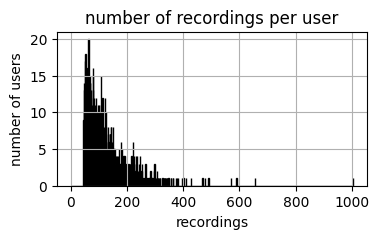

count    1211.000000
mean      122.743187
std        77.902902
min        45.000000
25%        69.000000
50%       102.000000
75%       148.000000
max      1002.000000
dtype: float64

In [57]:
show_hist_and_metrics(annotation_df)

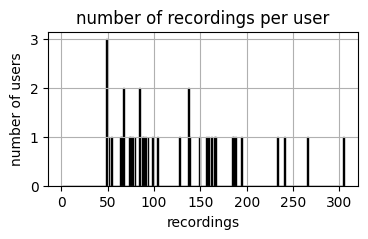

count     40.000000
mean     121.850000
std       65.542529
min       48.000000
25%       71.500000
50%       95.500000
75%      162.750000
max      304.000000
dtype: float64

In [58]:
show_hist_and_metrics(annotation_df, type='test')